this is input X [[-0.10881913 -0.52200257]
 [ 0.46123726 -0.19671096]
 [-0.82687828  0.04238839]
 [ 0.68122093 -0.7185164 ]
 [-0.66868098  0.83231694]
 [-0.45735415  0.76042952]
 [-0.00625247  0.21285365]
 [-0.47256959 -0.9224876 ]
 [-0.75499251  0.350942  ]
 [-0.43186661  0.57116819]]
(10, 2)
point x above -0.108819131888
point y above -0.522002565392
point x above 0.461237258683
point y above -0.1967109568
point x above -0.826878278522
point y above 0.0423883881877
point x above 0.681220929813
point y above -0.718516397771
point x below -0.668680982488
point y below 0.832316939948
point x below -0.457354146827
point y below 0.760429520663
point x above -0.0062524725171
point y above 0.212853647513
point x above -0.472569586266
point y above -0.922487598017
point x above -0.754992514629
point y above 0.350941995831
point x above -0.431866606856
point y above 0.571168189152
this is target y [[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]


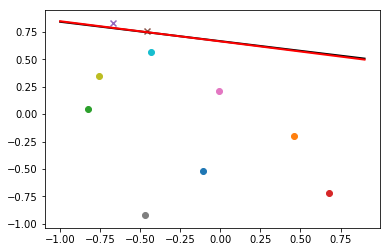

This is target output [[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
This is the hypothesis [[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
These are final weights [[ 2.         -0.55607464 -3.01573887]]


In [4]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 21 10:57:46 2017

@author: Ravindra kompella
"""

import matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np

fig, ax = plt.subplots(1)

# initializing the input space X with random uniform values between -1 and 1

def initializeX(examples):
    X = np.zeros([examples, 2])
    X[:,0] = np.random.uniform(-1, 1, examples)
    X[:,1] = np.random.uniform(-1, 1, examples)
    return X

# initialize X with N=10 examples
X = initializeX(10)
print('this is input X', X)


# initializing a line to be drawn. This forms the target function for PLA
x1,y1,x2,y2 = np.random.uniform(-1,1,4)
line_eqn = lambda x : ((y2-y1)/(x2-x1)) * (x - x1) + y1
xrange = np.arange(-1,1,0.1)
ax.plot(xrange, [line_eqn(x) for x in xrange], color='k', linestyle='-', linewidth=2)

# determine if y=1 or y =-1 depending on the x in X above/below the line
def initializeY(X):
    y = np.zeros([10,1])
    [m,n] = X.shape
    print(X.shape)
    
    for i in range(0,m):
        px = X[i,0]
        py = X[i,1]
        
        if (px*(y2-y1)-py*(x2-x1)>(x1*y2-x2*y1)):
            ax.scatter(X[i,0],X[i,1], marker = 'o')
            y[i] = 1
            print("point x above", X[i,0])
            print("point y above", X[i,1])
        else:
            ax.scatter(X[i,0],X[i,1], marker = 'x')
            y[i] = -1
            print("point x below", X[i,0])
            print("point y below", X[i,1])
    
    return y

y = initializeY(X)
print('this is target y', y)

# initialize weight vector
initW = np.zeros([1,X.shape[1]-1])

# add bias column to X
v = np.ones([X.shape[0],1])
X = np.c_[v,X]

# determine sign of a given value
def sign(a):
    if a > 0:
        return 1
    else:
        return -1

#initialize h (hypothesis with all zeros)
h = np.zeros([10,1])
    
# determine final weights
def computeWeights(iter,w,h):   
    for n in range(0,iter):
        # find the index of the row where hypothesis doesnt match target output.
        # This gives the index of the first misclassified point by hypothesis.    
        er=np.where(np.all(y!= h, axis=1))
        if er[0].size:
            w = w + y[er[0]][0]*X[er[0],:][0]
            Hyp = np.dot(X,np.transpose(w))
            for i in range(0,X.shape[0]):
                h[i,0] = sign(Hyp[i,0])
        else:
            break
    return w

w = computeWeights(15,initW,h)

le = lambda x : (-w[0,0]-w[0,1]*x)/w[0,2]
xrange = np.arange(-1,1,0.1)
ax.plot(xrange, [le(x) for x in xrange], color='r', linestyle='-', linewidth=2)
plt.show()

print('This is target output', y)
print('This is the hypothesis', h)
print('These are final weights', w)